In [7]:
import json
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint
import matplotlib.pyplot as plt
from itertools import combinations

In [14]:
target = "dhdk"
authors_json = '../data/{0}/{0}_authors.json'.format(target)
publications_json = '../data/{0}/{0}_publications.json'.format(target)

In [18]:
with open(authors_json, 'r') as f:
    authors = json.load(f)

with open(publications_json, 'r') as f:
    publications = json.load(f)

G = nx.Graph()

### Add the authors as nodes

In [22]:
for prof in publications:
    for link in publications[prof]['Publications']:
        for author, coauthor in combinations(publications[prof]['Publications'][link]['internalAuthor'], 2):
            if G.has_edge(authors[author]['Nome completo'], authors[coauthor]['Nome completo']):
                G[authors[author]['Nome completo']][authors[coauthor]['Nome completo']]['weight'] += 1
                G[authors[author]['Nome completo']][authors[coauthor]['Nome completo']]['publications'].append(link)
            else:
                G.add_edge(authors[author]['Nome completo'], authors[coauthor]['Nome completo'], weight=1, publications=[link])

marilena.daquino2
silvio.peroni
paola.italia
fabio.vitali
daniele.donati
francesca.tomasi
giorgio.spedicato
annafelicia.zuffran2
ilaria.bartolini
michela.milano
aldo.gangemi
monica.palmirani
sofia.pescarin
fabio.tamburini
giulio.iovine2
luca.trapin
saverio.giallorenzo2
simone.ferriani
ekaterina.baskakova2


### Add the publications as edges

In [16]:
publications.keys()

dict_keys(['marilena.daquino2', 'silvio.peroni', 'paola.italia', 'fabio.vitali', 'daniele.donati', 'francesca.tomasi', 'giorgio.spedicato', 'annafelicia.zuffran2', 'ilaria.bartolini', 'michela.milano', 'aldo.gangemi', 'monica.palmirani', 'sofia.pescarin', 'fabio.tamburini', 'giulio.iovine2', 'luca.trapin', 'saverio.giallorenzo2', 'simone.ferriani', 'ekaterina.baskakova2'])

### Visualize the network

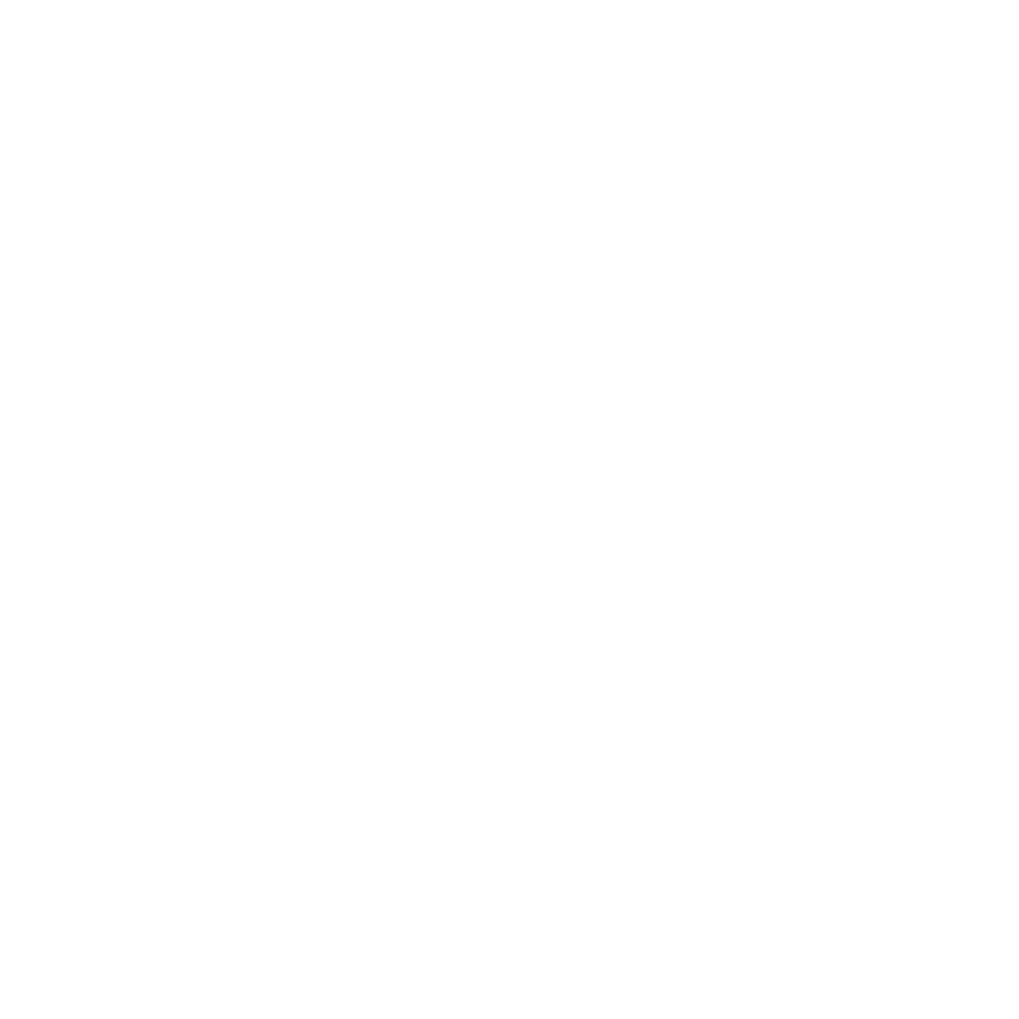

In [20]:
color_palette = {
    'DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANISTICA': 'gold',
    'DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGNERIA': 'green',
}


bbox_props = {
    'boxstyle': 'round',
    'facecolor': 'white',
    'edgecolor': 'black',
    'linewidth': 1,
    'pad': 0.5,
    'alpha': 1,
}

pos = nx.spring_layout(G, iterations=30)
plt.figure(figsize=(10,10))
nx.draw(G, 
        pos,
        node_color=[color_palette[node[1]['affiliation']] if color_palette.get(node[1]['affiliation']) else 'blue' for node in G.nodes(data=True)], 
        node_size = [800 if node[0] in list else 10 for node in G.nodes(data=True)],)
for node, data in G.nodes(data=True):
    if node in list:
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=12, font_color='black', verticalalignment='top', bbox=bbox_props)
    else:
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=5, font_color='black', verticalalignment='top')

plt.show()

### Write the network

In [ ]:
nx.write_gml(G, '../data/{0}/{0}_network.gml'.format(target), stringizer=lambda x: str(x))